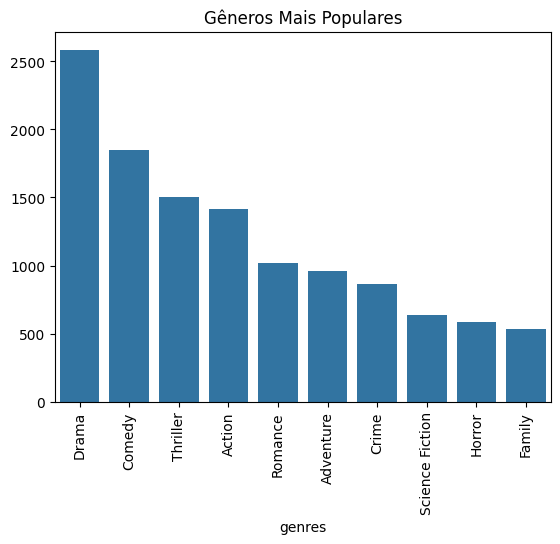

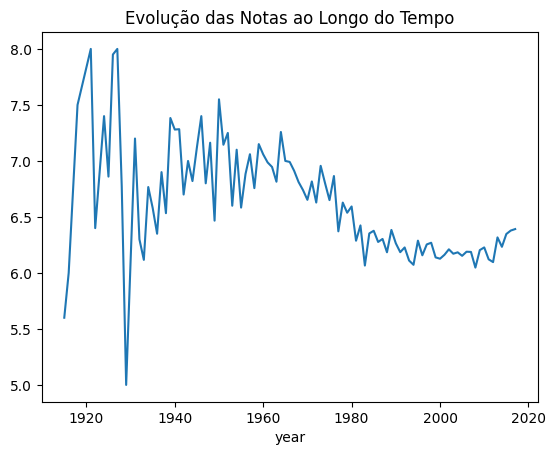

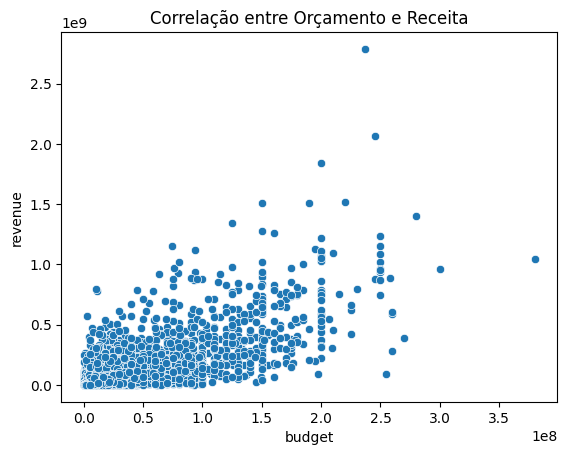

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(filepath):
    return pd.read_csv(filepath, on_bad_lines='skip', low_memory=False)

def clean_data(df):
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
    df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
    df = df.dropna(subset=['title', 'genres', 'release_date', 'budget', 'revenue', 'vote_average'])
    df = df[(df['budget'] > 0) & (df['revenue'] > 0)]
    return df

def extract_genres(genres_str):
    import ast
    try:
        genres = ast.literal_eval(genres_str)
        return [genre['name'] for genre in genres]
    except (ValueError, SyntaxError):
        return []

def analyze_genres(df):
    df['genres'] = df['genres'].apply(extract_genres)
    all_genres = df['genres'].explode().value_counts().head(10)
    return all_genres

def analyze_ratings_over_time(df):
    df['year'] = df['release_date'].dt.year
    return df.groupby('year')['vote_average'].mean()

def analyze_budget_revenue_correlation(df):
    return df[['budget', 'revenue']].corr()

def plot_genres(genres):
    sns.barplot(x=genres.index, y=genres.values)
    plt.title('Gêneros Mais Populares')
    plt.xticks(rotation=90)
    plt.show()

def plot_ratings_over_time(ratings_over_time):
    ratings_over_time.plot(title='Evolução das Notas ao Longo do Tempo')
    plt.show()

def plot_budget_revenue(df):
    sns.scatterplot(data=df, x='budget', y='revenue')
    plt.title('Correlação entre Orçamento e Receita')
    plt.show()

data_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'data', 'movies_metadata.csv'))
df = load_data(data_path)
df = clean_data(df)

genres = analyze_genres(df)
plot_genres(genres)

ratings_over_time = analyze_ratings_over_time(df)
plot_ratings_over_time(ratings_over_time)

correlation = analyze_budget_revenue_correlation(df)
plot_budget_revenue(df)


Resumimos os seguintes aspectos do dataset de filmes:
- Gêneros mais populares
- Evolução das notas ao longo do tempo
- Correlação entre orçamento e receita


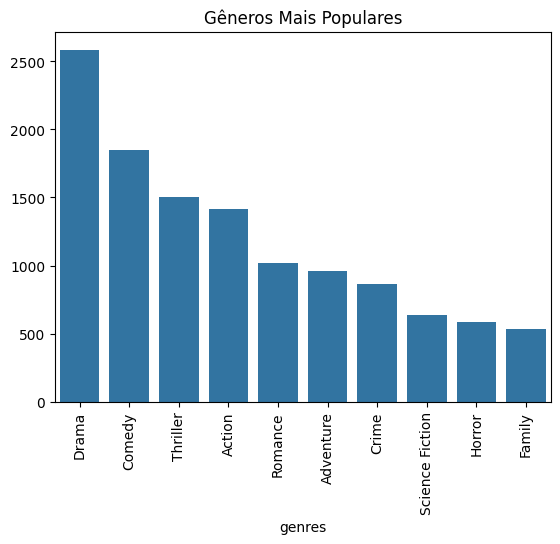

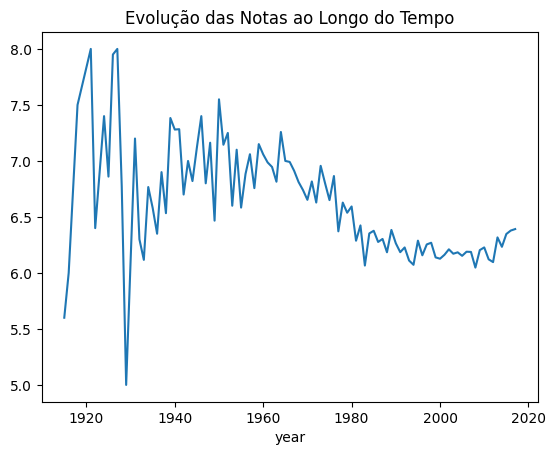

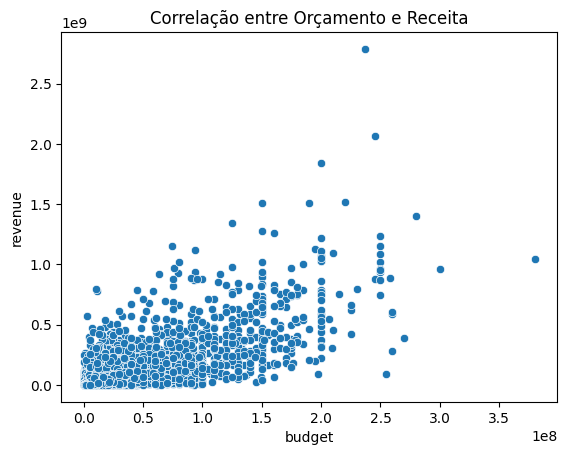

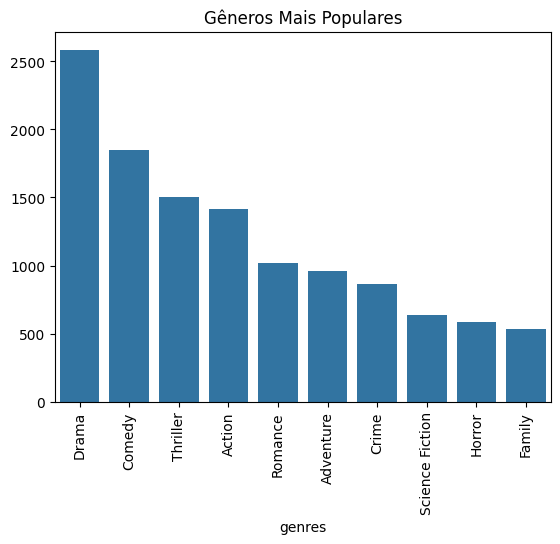

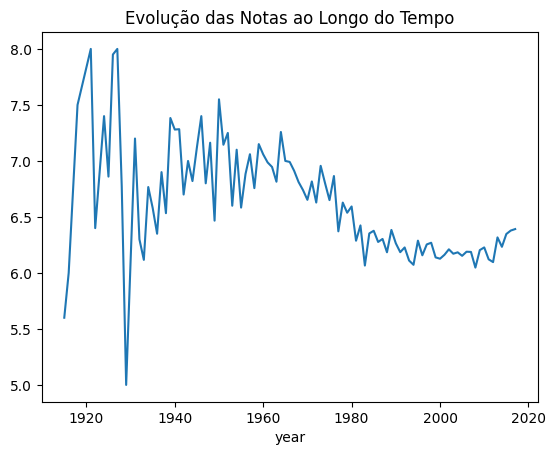

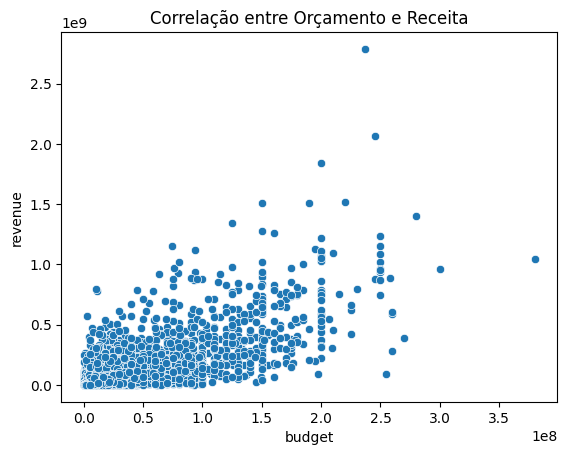

In [4]:
print("Resumimos os seguintes aspectos do dataset de filmes:")
print("- Gêneros mais populares")
print("- Evolução das notas ao longo do tempo")
print("- Correlação entre orçamento e receita")

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=genres.index, y=genres.values)
plt.title('Gêneros Mais Populares')
plt.xticks(rotation=90)
plt.show()

ratings_over_time.plot(title='Evolução das Notas ao Longo do Tempo')
plt.show()

sns.scatterplot(data=df, x='budget', y='revenue')
plt.title('Correlação entre Orçamento e Receita')
plt.show()

plot_genres(genres)
plot_ratings_over_time(ratings_over_time)
plot_budget_revenue(df)
